---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiantes: **Alexander Calderón Torres - Luis Gabriel Masis Fernandez - Jonathan Barrantes Castillo**
- Carnés: **B61325 - B84666 - B50891**
- Grupo: **1/13**


# `P5` - *Procesos M/M/s*
Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.
---


## 1. - Determinación teórica del número $s$ de servidores necesarios para cumplir el requisito

La tasa de llegada es $\lambda = 7$ $\frac{Personas}{minuto}$.

La tasa de servicio de cada servidor es $\nu = 0.25$ $\frac{Personas}{minuto}$.

La cantidad de clientes en el sistema es $i\left(estados\right)$.

Se requiere determinar el número de **servidores** necesarios para que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio.

Esto se puede expresar como (asumiendo que los servidores están ocupados en todo momento):

>$P(101 \text{ o } \text{más } \text{clientes } \text{en } \text{el } \text{sistema}) \leq 0.05\\ \Leftrightarrow \sum_{i=101}^{\infty} \phi_i \leq 0.05\\ \Leftrightarrow 1-\sum_{i=0}^{101} \phi_i \leq 0.05$ (1)

Donde $\phi_i$ corresponde al vector de probabilidad de estado estable para cada estado i.

Ahora, como se trata de un sistema M/M/s se sabe que:

>$\phi_i = \frac{s^s \rho^i}{s!} \cdot \phi_0$

con $i\geq s$ (servidores ocupados en todo momento),

>$\phi_0 = \left[\sum_{k=0}^{s-1} \frac{\left(s \rho \right)^k}{k!} + \frac{\left(s \rho \right)^s}{s!\left(1-\rho \right)} \right]^{-1}$

y

>$\rho=\frac{\lambda}{s\nu}$

Para garantizar que el sistema alcanza un estado estacionario se debe cumplir que:

> $\rho < 1  \\\Leftrightarrow \frac{\lambda}{s\nu} < 1 \\\Leftrightarrow \frac{7}{0.25 s} < 1 \\\Leftrightarrow 28 < s $

Por lo tanto, se sabe que en primera instancia que la cantidad de servidores debe ser **mayor que 28**.

Ahora, sustituyendo en (1):
>$1-\sum_{i=0}^{100} \frac{s^s \rho^i}{s!} \cdot \left[\sum_{k=0}^{s-1} \frac{\left(s \rho \right)^k}{k!} + \frac{\left(s \rho \right)^s}{s!\left(1-\rho \right)} \right]^{-1} \leq 0.05 \\\Leftrightarrow 1-\sum_{i-0}^{100} \frac{s^s \left(\frac{\lambda}{s\nu}\right)^i}{s!} \cdot \left[\sum_{k=0}^{s-1} \frac{\left(s \left(\frac{\lambda}{s\nu}\right) \right)^k}{k!} + \frac{\left(s \left(\frac{\lambda}{s\nu}\right) \right)^s}{s!\left(1-\left(\frac{\lambda}{s\nu}\right) \right)} \right]^{-1} \leq 0.05$

Utilizando Wolfram Alpha para resolver lo anterior:

>$ s \geq 28.38$

Finalmente se deduce que, con un mínimo de 29 servidores, se garantiza que al menos el 95% del tiempo habrá 100 o menos personas en fila.

---

## 2. - Modificación del código provisto para simular y corroborar el resultado anterior.


Resultados para  29  servidores
Parámetro lambda = 7.0
Parámetro nu * cantidad de servidores = 7.25
Tiempo con más de 100 solicitudes en fila:
	 1.52%
	 Sí cumple con la especificación.
Simulación es equivalente a 250.75 horas.


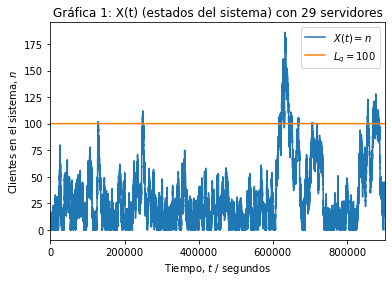

Resultados para  25  servidores
Parámetro lambda = 7.0
Parámetro nu * cantidad de servidores = 6.25
Tiempo con más de 100 solicitudes en fila:
	 99.08%
	 No cumple con la especificación.
Simulación es equivalente a 280.17 horas.


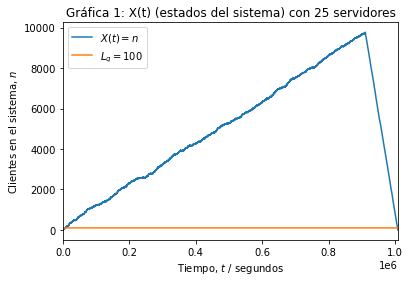


En la gráfica 1 se logra apreciar que sí se cumple la especificación utilizando una cantidad
de servidores mayor a 28,comparado con la gráfica 2, en la que al tener una cantidad inferior
a 28 servidores no cumple con la especificación (y no alcanza nunca un estado estable, situación
que sí se aprecia en el primer caso).



In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Primera
# Número de clientes
N = 100000

# Número de servidores
servers = 29

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio de múltiples servidores(servicios/segundos)*servidores
nu = (0.25/60)*servers

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - servers en fila)
P = 100+29

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados servers
print('Resultados para ', servers, ' servidores')
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu * cantidad de servidores =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-servers))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema) con 29 servidores
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-servers)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-servers)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.title('Gráfica 1: X(t) (estados del sistema) con 29 servidores')
plt.xlim((0, len(t)))
plt.show()

# Segunda
# Número de clientes
N = 100000

# Número de servidores
servers = 25

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio de múltiples servidores(servicios/segundos)*servidores
nu = (0.25/60)*servers

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - servers en fila)
P = 100+25

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados servers
print('Resultados para ', servers, ' servidores')
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu * cantidad de servidores =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-servers))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema) con 29 servidores
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-servers)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-servers)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.title('Gráfica 1: X(t) (estados del sistema) con 25 servidores')
plt.xlim((0, len(t)))
plt.show()

print('''
En la gráfica 1 se logra apreciar que sí se cumple la especificación utilizando una cantidad
de servidores mayor a 28,comparado con la gráfica 2, en la que al tener una cantidad inferior
a 28 servidores no cumple con la especificación (y no alcanza nunca un estado estable, situación
que sí se aprecia en el primer caso).
''')

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---